In [39]:
import pandas as pd

# 예제 데이터프레임 생성
df = pd.read_csv('all_features(2).csv')
df.reset_index()

,index,PMI,VIXCLS,DGS2,실질금리,LNG_future_Close,LNG_future_Adj Close,Gold_future_Close,Gold_future_Adj Close,Silver_future_Close,...,USD/KRW_Close,USD/KRW_Adj Close,JPY/KRW_Close,JPY/KRW_Adj Close,EUR/KRW_Close,EUR/KRW_Adj Close,KS200_Close,KS200_Adj Close,국고채5년_return_on_market,미국소비자물가지수
0,0,51.0,13.6140,0.26,3.044001,3.327,3.327,1660.000000,1660.000000,30.367001,...,1057.599976,1057.599976,11.850000,11.850000,1402.920044,1402.920044,263.320007,263.320007,0.02870,230.280
1,1,51.0,13.3040,0.26,3.044001,3.566,3.566,1686.599976,1686.599976,31.902000,...,1057.099976,1057.099976,11.768000,11.768000,1413.359985,1413.359985,261.709991,261.709991,0.02850,230.280
2,2,51.0,12.6175,0.28,3.044001,3.444,3.444,1656.400024,1656.400024,31.180000,...,1068.300049,1068.300049,11.798000,11.798000,1428.219971,1428.219971,256.059998,256.059998,0.02820,230.280
3,3,51.1,13.6760,0.27,3.036657,3.301,3.301,1669.400024,1669.400024,31.941999,...,1087.300049,1087.300049,11.857000,11.857000,1480.430054,1480.430054,257.640015,257.640015,0.02900,232.166
4,4,51.1,13.6640,0.25,3.036657,3.272,3.272,1666.000000,1666.000000,31.424999,...,1089.300049,1089.300049,11.633000,11.633000,1458.599976,1458.599976,257.089996,257.089996,0.02840,232.166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,551,49.3,15.3340,4.78,3.849838,2.577,2.577,1939.599976,1939.599976,23.617001,...,1296.400024,1296.400024,9.091037,9.091037,1421.489990,1421.489990,341.250000,341.250000,0.03779,307.026
552,552,49.3,15.6820,4.89,3.849838,2.770,2.770,1912.900024,1912.900024,22.674000,...,1318.329956,1318.329956,9.100372,9.100372,1443.189941,1443.189941,338.980011,338.980011,0.03734,307.026
553,553,49.3,16.6500,4.92,3.849838,2.551,2.551,1886.099976,1886.099976,22.695000,...,1339.079956,1339.079956,9.189846,9.189846,1455.290039,1455.290039,328.420013,328.420013,0.03804,307.026
554,554,49.3,16.5920,5.03,3.849838,2.540,2.540,1911.099976,1911.099976,24.219999,...,1326.619995,1326.619995,9.082177,9.082177,1431.619995,1431.619995,330.250000,330.250000,0.03843,307.026


In [40]:
columns = ['LNG_future', 'Gold_future', 'Silver_future', 'USD/KRW', 'JPY/KRW', 'EUR/KRW', 'KS200']

different_indices = {}

for column in columns:
    close_col = f"{column}_Close"
    adj_close_col = f"{column}_Adj Close"
    
    indices = df[df[close_col] != df[adj_close_col]].index.tolist()
    if indices:
        different_indices[column] = indices

print(different_indices)


{'KS200': [247]}


In [41]:
# 'Adj Close'가 포함된 모든 컬럼을 찾아서 삭제
adj_close_columns = [col for col in df.columns if 'Adj Close' in col]
df_cleaned = df.drop(columns=adj_close_columns)

# 데이터프레임의 처음 몇 줄 확인
df_cleaned.head()


,PMI,VIXCLS,DGS2,실질금리,LNG_future_Close,Gold_future_Close,Silver_future_Close,Copper_future_Close,WTI_oil_Close,Brent_oil_Close,Corn_future_Close,Wheat_future_Close,DTB3,USD/KRW_Close,JPY/KRW_Close,EUR/KRW_Close,KS200_Close,국고채5년_return_on_market,미국소비자물가지수
0,51.0,13.6140,0.26,3.044001,3.327,1660.000000,30.367001,3.6395,93.559998,110.639999,708.75,754.75,0.0007,1057.599976,11.850,1402.920044,263.320007,0.0287,230.280
1,51.0,13.3040,0.26,3.044001,3.566,1686.599976,31.902000,3.6635,95.559998,110.610001,727.50,791.25,0.0008,1057.099976,11.768,1413.359985,261.709991,0.0285,230.280
2,51.0,12.6175,0.28,3.044001,3.444,1656.400024,31.180000,3.6395,95.879997,113.279999,720.75,776.50,0.0008,1068.300049,11.798,1428.219971,256.059998,0.0282,230.280
3,51.1,13.6760,0.27,3.036657,3.301,1669.400024,31.941999,3.7755,97.769997,116.760002,736.00,765.00,0.0006,1087.300049,11.857,1480.430054,257.640015,0.0290,232.166
4,51.1,13.6640,0.25,3.036657,3.272,1666.000000,31.424999,3.7535,95.720001,118.900002,709.00,756.25,0.0007,1089.300049,11.633,1458.599976,257.089996,0.0284,232.166


In [42]:
basic_statistics = df_cleaned.describe()
missing_values = df_cleaned.isnull().sum()

In [43]:
basic_statistics

,PMI,VIXCLS,DGS2,실질금리,LNG_future_Close,Gold_future_Close,Silver_future_Close,Copper_future_Close,WTI_oil_Close,Brent_oil_Close,Corn_future_Close,Wheat_future_Close,DTB3,USD/KRW_Close,JPY/KRW_Close,EUR/KRW_Close,KS200_Close,국고채5년_return_on_market,미국소비자물가지수
count,504.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.00000,556.000000,556.000000,556.000000,555.000000,555.000000,556.000000
mean,50.473016,17.843460,1.392428,2.462301,3.357964,1468.158634,19.435020,3.121517,66.439478,71.678831,457.655576,585.122752,0.01041,1153.938022,10.260860,1336.093682,295.211622,0.022302,255.417403
std,1.642570,6.996837,1.284012,0.733150,1.358772,276.408714,4.014454,0.675975,22.002292,23.479690,130.813124,148.040212,0.01397,78.937050,0.652409,68.516124,51.358666,0.007691,21.305225
min,35.700000,9.340000,0.090000,1.251600,1.495000,1056.199951,12.349000,1.939500,16.940001,21.440001,307.750000,373.250000,-0.00010,1008.719971,8.944400,1165.189941,213.669998,0.010310,230.280000
25%,50.100000,13.237000,0.387500,1.896498,2.582750,1247.974976,16.309749,2.642000,49.129999,52.617502,361.937500,480.750000,0.00050,1102.189972,9.789075,1288.365021,256.084992,0.016295,238.009500
50%,50.500000,15.772000,0.845000,2.306985,2.944500,1324.200012,18.045000,3.034500,61.475001,66.765000,387.125000,535.250000,0.00290,1135.114990,10.197675,1332.900024,279.119995,0.020310,251.233000
75%,51.400000,20.747500,2.250000,3.054536,3.805500,1757.750000,22.520750,3.525500,82.767500,86.457500,552.625000,674.437500,0.01715,1188.485016,10.739000,1375.052551,318.875000,0.028155,261.582000
max,52.600000,74.618000,5.030000,4.264430,9.336000,2017.400024,31.941999,4.929000,120.669998,122.010002,818.250000,1348.000000,0.05340,1430.310059,11.857000,1515.250000,440.399994,0.046380,307.789000


In [44]:
missing_values

PMI                       52
VIXCLS                     0
DGS2                       0
실질금리                       0
LNG_future_Close           0
Gold_future_Close          0
Silver_future_Close        0
Copper_future_Close        0
WTI_oil_Close              0
Brent_oil_Close            0
Corn_future_Close          0
Wheat_future_Close         0
DTB3                       0
USD/KRW_Close              0
JPY/KRW_Close              0
EUR/KRW_Close              0
KS200_Close                1
국고채5년_return_on_market     1
미국소비자물가지수                  0
dtype: int64

In [45]:
# PMI 값이 35.7인 모든 행의 인덱스 찾기
pmi_35_7_indices = df_cleaned[df_cleaned['PMI'] == 35.7].index.tolist()
number_of_indices = len(pmi_35_7_indices)

number_of_indices, pmi_35_7_indices

(4, [373, 374, 375, 376])

In [46]:
# PMI의 최솟값이 35.7인 행의 인덱스 찾기
min_pmi_index = df_cleaned[df_cleaned['PMI'] == 35.7].index[0]

# 해당 인덱스와 그 앞뒤의 값을 출력
df_cleaned.loc[min_pmi_index-1:min_pmi_index+1, 'PMI']

372     NaN
373    35.7
374    35.7
Name: PMI, dtype: float64

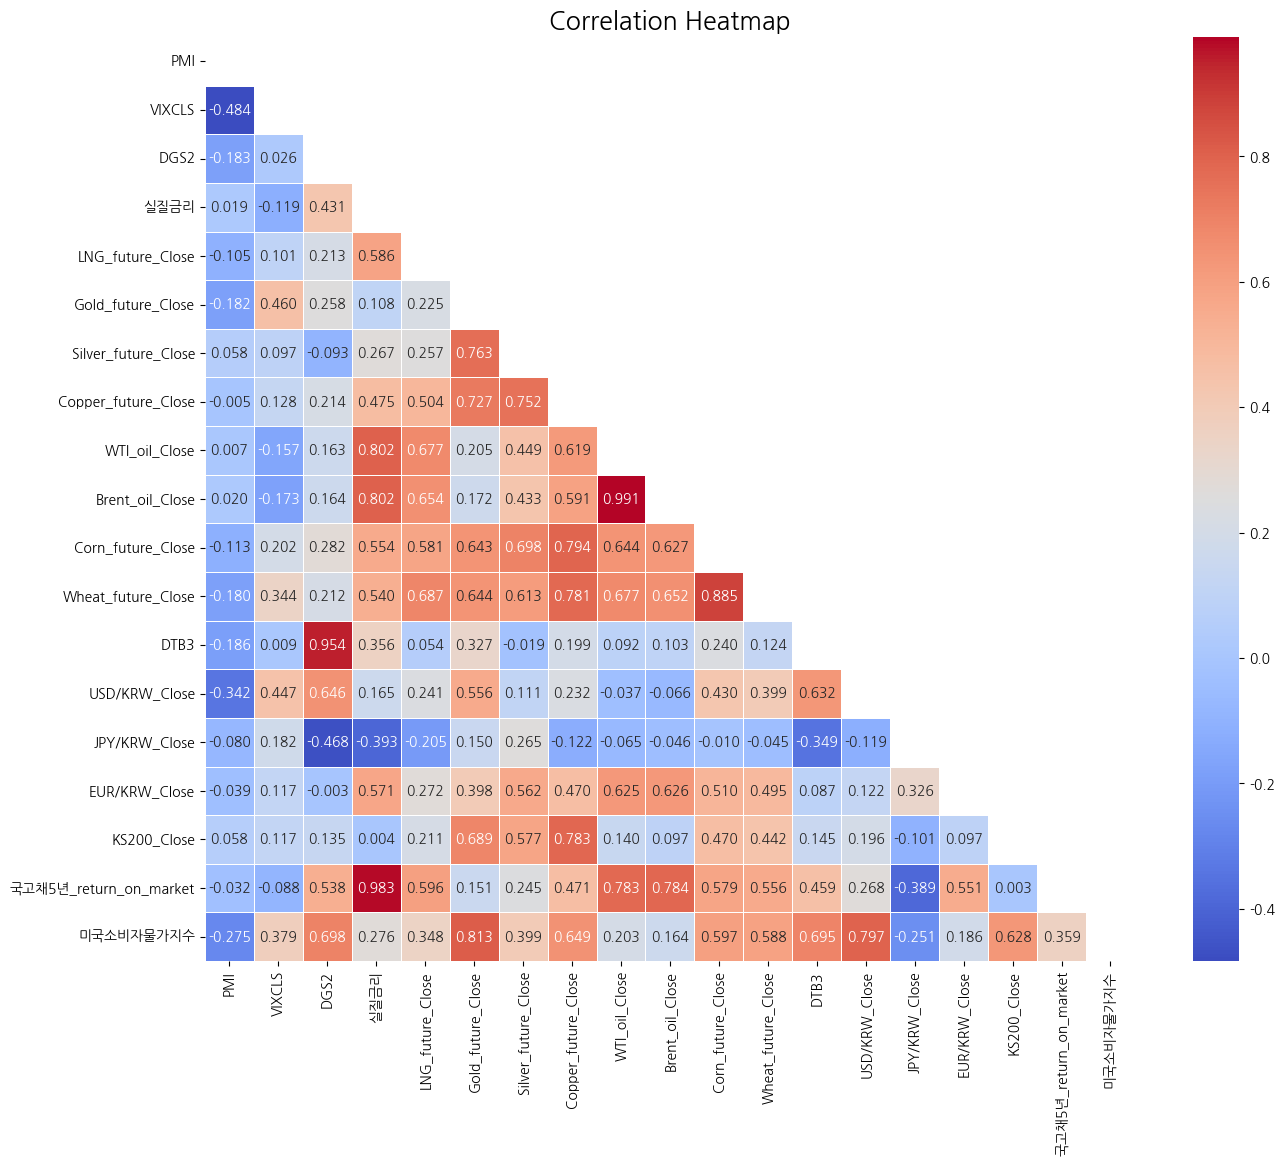

{('Brent_oil_Close', 'WTI_oil_Close'): 0.991,
 ('국고채5년_return_on_market', '실질금리'): 0.983,
 ('DGS2', 'DTB3'): 0.954,
 ('Corn_future_Close', 'Wheat_future_Close'): 0.885,
 ('Gold_future_Close', '미국소비자물가지수'): 0.813,
 ('WTI_oil_Close', '실질금리'): 0.802,
 ('Brent_oil_Close', '실질금리'): 0.802,
 ('USD/KRW_Close', '미국소비자물가지수'): 0.797,
 ('Copper_future_Close', 'Corn_future_Close'): 0.794,
 ('Brent_oil_Close', '국고채5년_return_on_market'): 0.784,
 ('Copper_future_Close', 'KS200_Close'): 0.783,
 ('WTI_oil_Close', '국고채5년_return_on_market'): 0.783,
 ('Copper_future_Close', 'Wheat_future_Close'): 0.781,
 ('Gold_future_Close', 'Silver_future_Close'): 0.763,
 ('Copper_future_Close', 'Silver_future_Close'): 0.752,
 ('Copper_future_Close', 'Gold_future_Close'): 0.727}

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

# 상관계수 행렬 계산
corr_matrix = df_cleaned.corr()

# 상관계수 행렬의 아래쪽을 NaN으로 채우기 (대각선을 기준으로)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 히트맵 생성
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".3f", cmap='coolwarm', linewidths=0.5, cbar=True)
plt.title("Correlation Heatmap", fontsize=18)
plt.show()

# 절대값이 0.7 이상인 상관계수를 가지는 컬럼 쌍 찾기
significant_corr_pairs = {}
for col in corr_matrix.columns:
    for idx in corr_matrix.index:
        if col == idx:  # 같은 컬럼 간의 상관계수는 무시
            continue
        if abs(corr_matrix[col][idx]) >= 0.7:
            # 중복되는 쌍을 피하기 위해 정렬 후 튜플로 변환
            pair = tuple(sorted([col, idx]))
            if pair not in significant_corr_pairs:
                significant_corr_pairs[pair] = round(corr_matrix[col][idx], 3)


# 상관계수 값을 기준으로 딕셔너리 정렬
sorted_corr_pairs = dict(sorted(significant_corr_pairs.items(), key=lambda item: abs(item[1]), reverse=True))

sorted_corr_pairs

In [1]:
import pandas as pd

# 데이터 파일 읽기
data = pd.read_csv('1차_전처리(수정2)).csv')

# 주어진 컬럼에 대해 0이 아닌 값들 사이를 등차로 채우는 함수
def fill_with_arithmetic_progression(data, column_name):
    # 0이 아닌 값을 가지는 인덱스 찾기
    non_zero_indices = data[data[column_name] != 0].index.tolist()
    
    # 각 0이 아닌 값들 사이에 대해서 등차로 값을 채우기
    for i in range(len(non_zero_indices) - 1):
        start_idx = non_zero_indices[i]
        end_idx = non_zero_indices[i + 1]
        start_val = data.loc[start_idx, column_name]
        end_val = data.loc[end_idx, column_name]
        
        # 등차값 계산
        diff = (end_val - start_val) / (end_idx - start_idx)
        
        # 값 채우기
        for j in range(1, end_idx - start_idx):
            data.loc[start_idx + j, column_name] = start_val + diff * j
            
    return data

# 'PMI' 컬럼에 대한 처리
data = fill_with_arithmetic_progression(data, 'PMI')

# '미국소비자물가지수' 컬럼에 대한 처리
data = fill_with_arithmetic_progression(data, '미국소비자물가지수')

# 처리된 데이터를 CSV 파일로 저장
data.to_csv('features.csv', index=False)


In [5]:
data = pd.read_csv('features.csv')

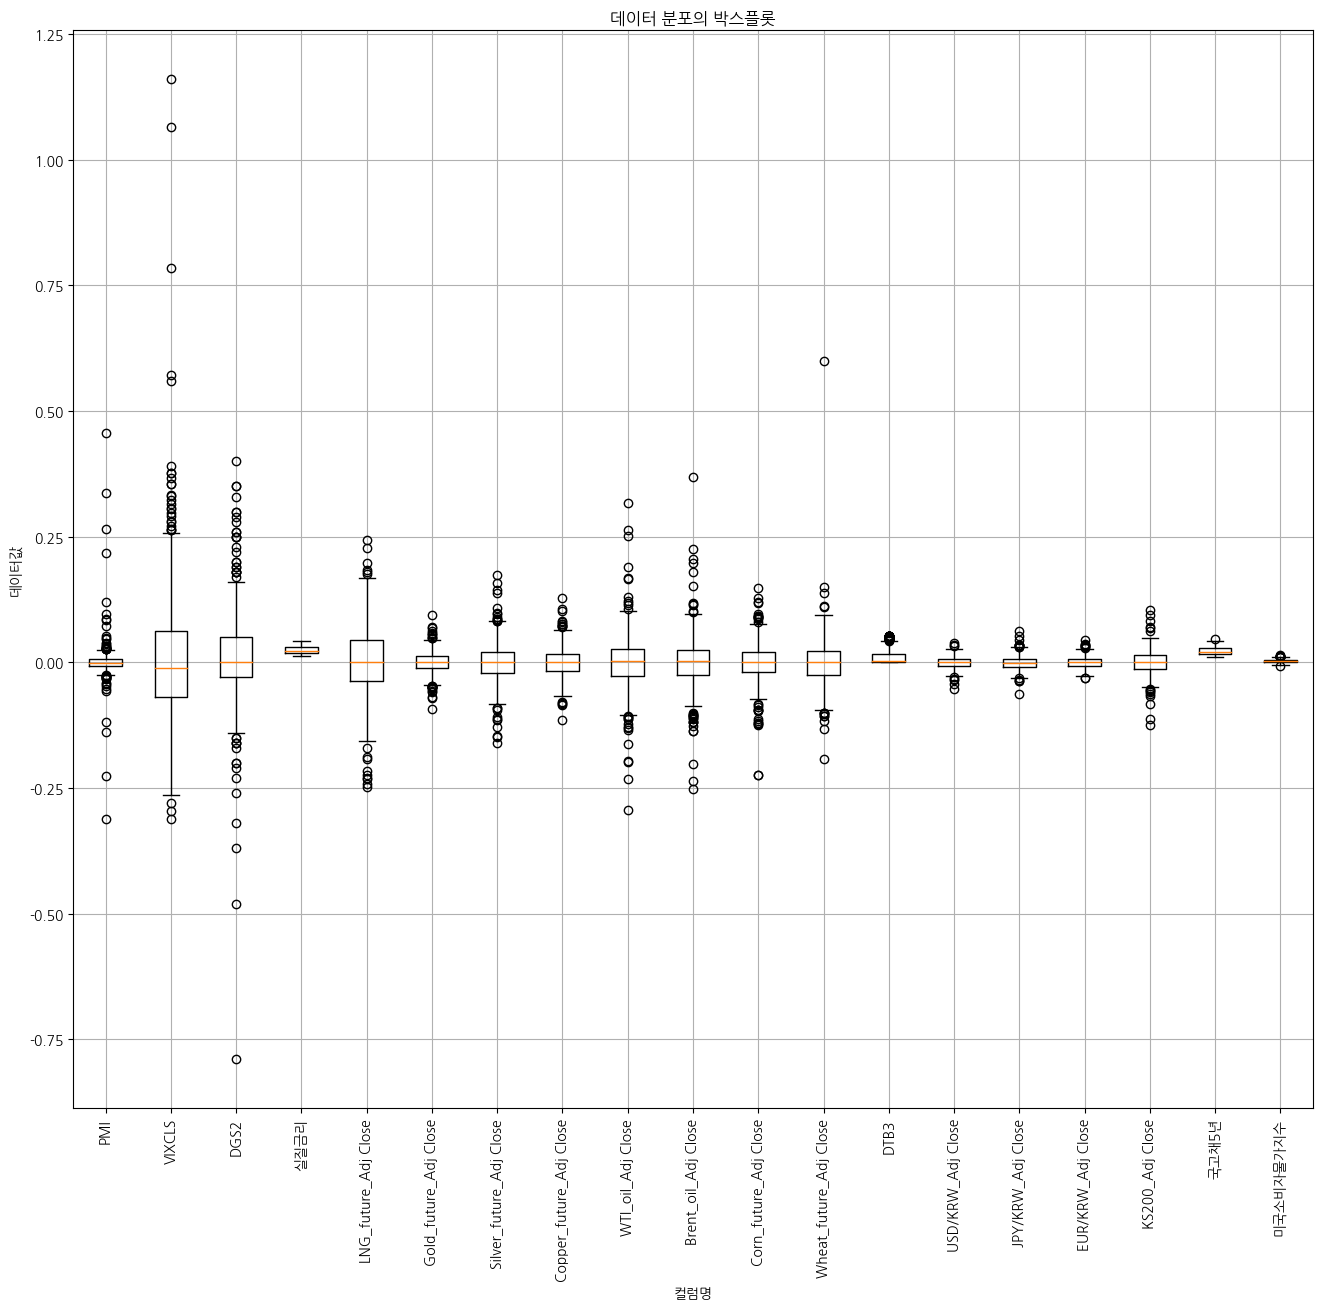

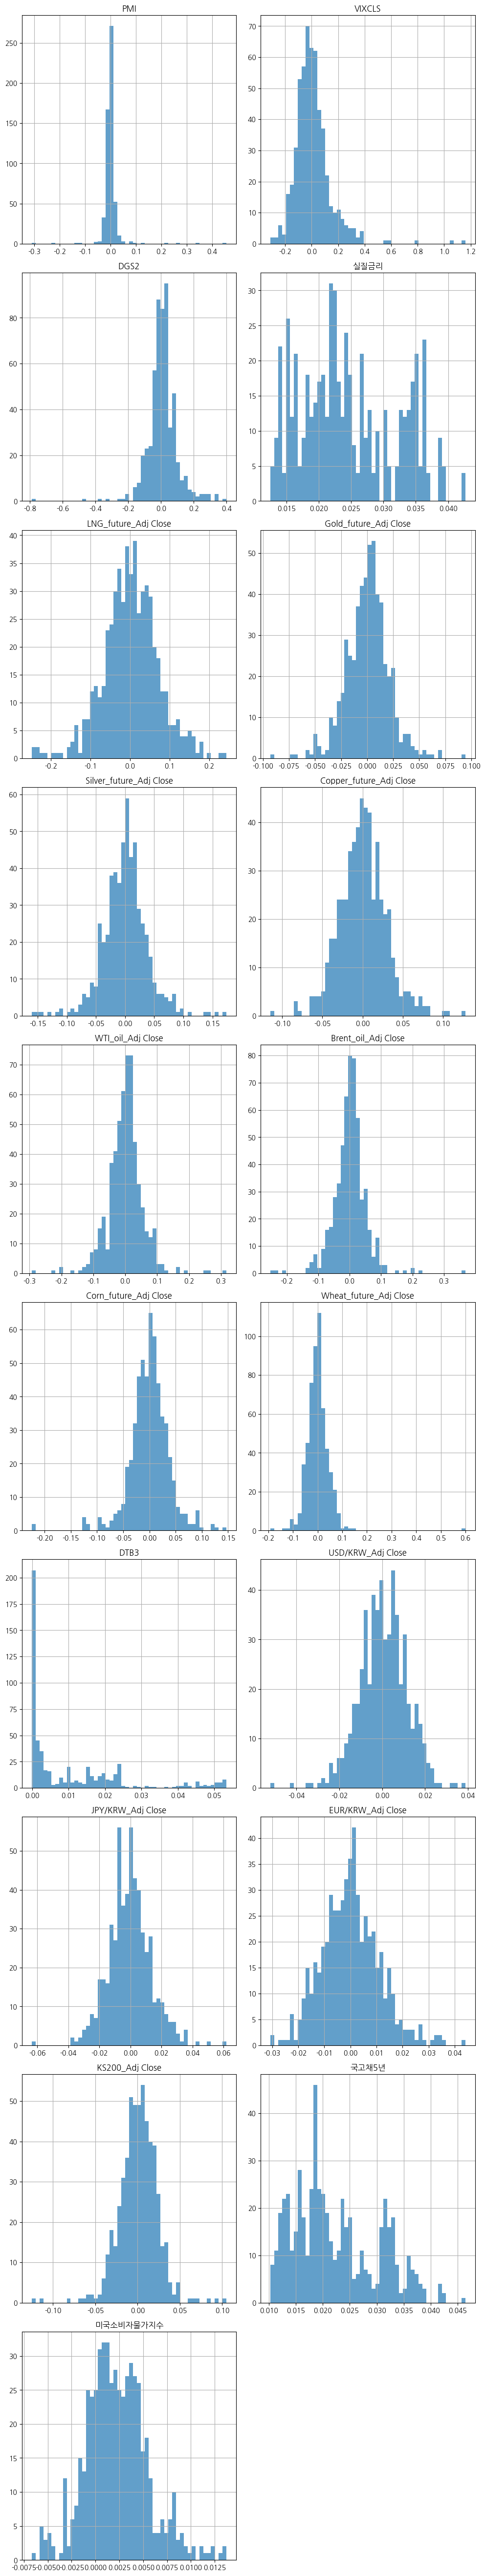

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv('features.csv')

# 한글 폰트 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

# 숫자 데이터만 포함된 컬럼을 선택
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# 데이터 컬럼명 가져오기
x_labels_numeric = numeric_data.columns

# 박스플롯 그리기
plt.figure(figsize=(16, 14))
plt.boxplot(numeric_data.values, vert=True)  # 박스플롯의 방향을 세로(90도 회전)로 변경
plt.xticks(range(1, len(x_labels_numeric) + 1), x_labels_numeric, rotation=90)  # x 축 라벨을 90도 회전
plt.title("데이터 분포의 박스플롯")
plt.xlabel("컬럼명")
plt.ylabel("데이터값")
plt.grid(True)
plt.show()

# 히스토그램 그리기
plt.figure(figsize=(10, 100))
for i, column in enumerate(numeric_data.columns, 1):
    plt.subplot(len(numeric_data.columns), 2, i)  # 컬럼 수에 맞게 히스토그램 그리기
    plt.hist(numeric_data[column], bins=50, alpha=0.7)  # 각 컬럼에 대한 히스토그램
    plt.title(column)
    plt.grid(True)

plt.tight_layout()  # 그래프 간격 조정
plt.show()
